In [14]:
import numpy as np
import pandas as pd
import seaborn as sns


In [49]:
sns.set_theme()
sns.set_context("talk")

In [3]:
df = pd.read_csv('data/master_df_2.csv')

treatment_cell_lines = ['JHH6_0uM_n1', 'JHH6_0uM_n2', 'JHH6_0uM_n3', 'JHH6_0uM_n4',
                        'JHH6_1uM_n1', 'JHH6_1uM_n2', 'JHH6_1uM_n3', 'JHH6_1uM_n4',
                        'JHH6_2.5uM_n1', 'JHH6_2.5uM_n2', 'JHH6_2.5uM_n3', 'JHH6_2.5uM_n4',
                        'JHH7_0uM_n1', 'JHH7_0uM_n2', 'JHH7_0uM_n3', 'JHH7_0uM_n4',
                        'JHH7_1uM_n1', 'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4',
                        'JHH7_2.5uM_n1', 'JHH7_2.5uM_n2', 'JHH7_2.5uM_n3', 'JHH7_2.5uM_n4']

treated_df = df[df.IMAGE_SERIES.isin(treatment_cell_lines)].reset_index(drop=True)
df.IMAGE_SERIES.unique()


array(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3', 'JHH4_B2',
       'JHH4_A2', 'JHH6_A1', 'JHH6_B1', 'JHH6_D1', 'JHH6_C1_pickup',
       'JHH7_C5', 'JHH7_D5', 'JHH7_A5', 'JHH7_B5_pickup', 'JHH7_2.5uM_n2',
       'JHH7_2.5uM_n3', 'JHH7_2.5uM_n4', 'JHH7_2.5uM_n1', 'JHH6_2.5uM_n2',
       'JHH6_2.5uM_n3', 'JHH6_2.5uM_n4', 'JHH6_2.5uM_n1', 'JHH7_0uM_n1',
       'JHH7_0uM_n4', 'JHH7_0uM_n3', 'JHH7_0uM_n2', 'JHH6_0uM_n2',
       'JHH6_0uM_n3', 'JHH6_0uM_n4', 'JHH6_0uM_n1', 'JHH7_1uM_n1',
       'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4', 'JHH6_1uM_n4',
       'JHH6_1uM_n3', 'JHH6_1uM_n2', 'JHH6_1uM_n1', 'Huh7_B4_Pickup',
       'Huh7_A4', 'Huh7_C4', 'Huh7_D4', 'Kami41_A6', 'Kami41_C6',
       'Kami41_D6', 'Kami41_B6_pickup', 'JHH4 D2', 'JHH4 C2 Pickup'],
      dtype=object)

In [5]:
# create a list of our conditions
conditions = [
    ((df['IMAGE_SERIES'] == 'PRF5_A3') | (df['IMAGE_SERIES'] == 'PRF5_B3_pickup') | (df['IMAGE_SERIES'] == 'PRF5_C3') | (df['IMAGE_SERIES'] == 'PRF5_D3')),
    ((df['IMAGE_SERIES'] == 'JHH4_A2') | (df['IMAGE_SERIES'] == 'JHH4_B2') | (df['IMAGE_SERIES'] == 'JHH4 C2 Pickup') | (df['IMAGE_SERIES'] == 'JHH4 D2')),
    ((df['IMAGE_SERIES'] == 'JHH6_A1') | (df['IMAGE_SERIES'] == 'JHH6_B1') | (df['IMAGE_SERIES'] == 'JHH6_C1_pickup') | (df['IMAGE_SERIES'] == 'JHH6_D1')),
    ((df['IMAGE_SERIES'] == 'Huh7_A4') | (df['IMAGE_SERIES'] == 'Huh7_B4_Pickup') | (df['IMAGE_SERIES'] == 'Huh7_C4') | (df['IMAGE_SERIES'] == 'Huh7_D4')),
    ((df['IMAGE_SERIES'] == 'Kami41_A6') | (df['IMAGE_SERIES'] == 'Kami41_B6_pickup') | (df['IMAGE_SERIES'] == 'Kami41_C6') | (df['IMAGE_SERIES'] == 'Kami41_D6')),
    ((df['IMAGE_SERIES'] == 'JHH7_A5') | (df['IMAGE_SERIES'] == 'JHH7_B5_pickup') | (df['IMAGE_SERIES'] == 'JHH7_C5') | (df['IMAGE_SERIES'] == 'JHH7_D5')),
    ((df['IMAGE_SERIES'] == 'JHH6_0uM_n1') | (df['IMAGE_SERIES'] == 'JHH6_0uM_n2') | (df['IMAGE_SERIES'] == 'JHH6_0uM_n3') | (df['IMAGE_SERIES'] == 'JHH6_0uM_n4')),
    ((df['IMAGE_SERIES'] == 'JHH6_1uM_n1') | (df['IMAGE_SERIES'] == 'JHH6_1uM_n2') | (df['IMAGE_SERIES'] == 'JHH6_1uM_n3') | (df['IMAGE_SERIES'] == 'JHH6_1uM_n4')),
    ((df['IMAGE_SERIES'] == 'JHH6_2.5uM_n1') | (df['IMAGE_SERIES'] == 'JHH6_2.5uM_n2') | (df['IMAGE_SERIES'] == 'JHH6_2.5uM_n3') | (df['IMAGE_SERIES'] == 'JHH6_2.5uM_n4')),
    ((df['IMAGE_SERIES'] == 'JHH7_0uM_n1') | (df['IMAGE_SERIES'] == 'JHH7_0uM_n2') | (df['IMAGE_SERIES'] == 'JHH7_0uM_n3') | (df['IMAGE_SERIES'] == 'JHH7_0uM_n4')),
    ((df['IMAGE_SERIES'] == 'JHH7_1uM_n1') | (df['IMAGE_SERIES'] == 'JHH7_1uM_n2') | (df['IMAGE_SERIES'] == 'JHH7_1uM_n3') | (df['IMAGE_SERIES'] == 'JHH7_1uM_n4')),
    ((df['IMAGE_SERIES'] == 'JHH7_2.5uM_n1') | (df['IMAGE_SERIES'] == 'JHH7_2.5uM_n2') | (df['IMAGE_SERIES'] == 'JHH7_2.5uM_n3') | (df['IMAGE_SERIES'] == 'JHH7_2.5uM_n4'))
    ]

# create a list of the values we want to assign for each condition
values = ['PRF5', 'JHH4', 'JHH6', 'Huh7', 'Kami41', 'JHH7', 'JHH6_0uM', 'JHH6_1uM', 'JHH6_2.5uM', 'JHH7_0uM', 'JHH7_1uM', 'JHH7_2.5uM']

In [6]:
# create a new column and use np.select to assign values to it using our lists as arguments
df['cell_line'] = np.select(conditions, values)

# display updated DataFrame
df

,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line
0,PRF5_B3_pickup,Track_0,0,12,0,0,0,0,0,11,...,29.000,1.000,10.000,9.781,0.093,0.123,0.059,0.100,0.017,PRF5
1,PRF5_B3_pickup,Track_1,1,10,0,0,0,0,0,9,...,2.000,0.000,1.000,0.928,0.087,0.116,0.040,0.094,0.023,PRF5
2,PRF5_B3_pickup,Track_2,2,3,0,0,0,0,0,2,...,4.000,2.000,4.000,1.414,0.067,0.075,0.056,0.070,0.008,PRF5
3,PRF5_B3_pickup,Track_3,3,7,0,0,0,0,0,6,...,12.837,2.459,6.725,3.562,0.096,0.100,0.094,0.096,0.002,PRF5
4,PRF5_B3_pickup,Track_4,4,3,0,0,0,0,0,2,...,15.758,7.837,15.758,5.601,0.075,0.080,0.071,0.073,0.004,PRF5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28951,JHH4 C2 Pickup,Track_562,171,28,1,2,0,0,0,29,...,12.144,1.261,3.776,2.951,20.357,30.860,0.938,23.666,8.401,JHH4
28952,JHH4 C2 Pickup,Track_563,172,24,1,2,0,0,0,25,...,26.095,0.513,6.390,7.976,11.447,22.958,0.681,11.079,6.412,JHH4
28953,JHH4 C2 Pickup,Track_571,180,17,0,0,0,0,0,16,...,39.380,0.910,10.010,9.622,13.101,20.086,8.683,10.978,4.414,JHH4
28954,JHH4 C2 Pickup,Track_578,187,7,0,0,0,0,0,6,...,32.209,8.133,15.220,9.544,1.150,1.464,0.510,1.325,0.317,JHH4


In [ ]:
df.to_csv('full_df.csv')

In [8]:
print(df.cell_line.unique())
print(len(df.cell_line.unique()))

['PRF5' 'JHH4' 'JHH6' 'JHH7' 'JHH7_2.5uM' 'JHH6_2.5uM' 'JHH7_0uM'
 'JHH6_0uM' 'JHH7_1uM' 'JHH6_1uM' 'Huh7' 'Kami41']
12


In [23]:
PRF5 = df[df['cell_line'] == 'PRF5']
PRF5_TRACK_MEAN_SPEED_df = PRF5[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]


In [60]:
# list containing names of each PRF5 images series
PRF5_list = PRF5_TRACK_MEAN_SPEED_df.IMAGE_SERIES.unique()

max_length = 0
for series in PRF5_list:
    print(series)
    series = PRF5_TRACK_MEAN_SPEED_df[PRF5_TRACK_MEAN_SPEED_df['IMAGE_SERIES'] == series]
    series_length = len(series)
    if series_length > max_length:
        max_length = series_length
    else:
        pass
    print(series_length)
#     print(type(series))
#     print(series.head())

print('max_length: ', max_length)

PRF5_B3_pickup
1880
PRF5_A3
2314
PRF5_C3
1355
PRF5_D3
1782
max_length:  2314


In [61]:
series = PRF5_TRACK_MEAN_SPEED_df[PRF5_TRACK_MEAN_SPEED_df['IMAGE_SERIES'] == 'PRF5_B3_pickup']['TRACK_MEAN_SPEED']
series

0       12.539
1        1.111
2        3.000
3        6.816
4       11.798
         ...  
1875     6.000
1876     3.128
1877    18.373
1878     9.912
1879     3.867
Name: TRACK_MEAN_SPEED, Length: 1880, dtype: float64

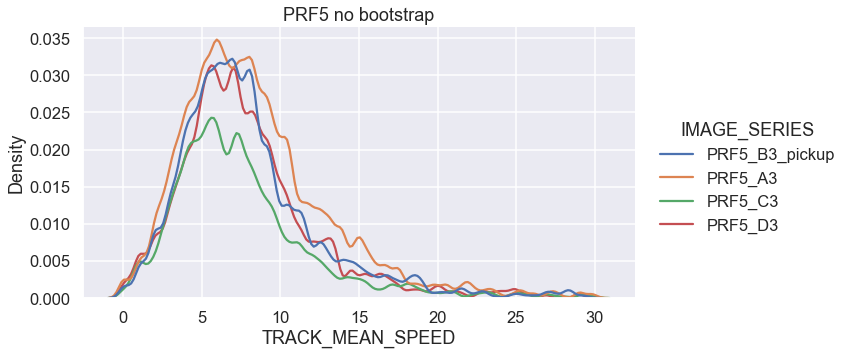

In [62]:
sns.displot(PRF5_TRACK_MEAN_SPEED_df, x='TRACK_MEAN_SPEED', hue='IMAGE_SERIES', kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='PRF5 no bootstrap')


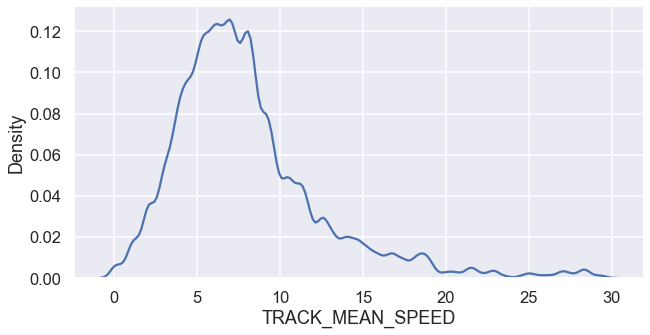

In [63]:
sns.displot(series, kind="kde", bw_adjust=.3, height=5, aspect=15/8)

2314


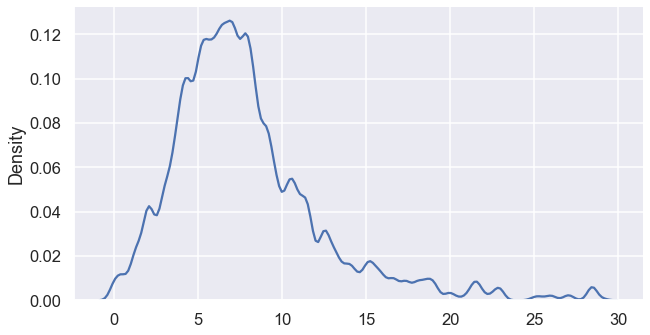

In [64]:
x = np.random.choice(series, size=max_length, replace=True)
print(len(x))

sns.displot(x, kind="kde", bw_adjust=.3, height=5, aspect=15/8)

In [52]:
# first, perform loop to identify max length for all image series for this cell line
max_length = 0
for series in PRF5_list:
    series = PRF5_TRACK_MEAN_SPEED_df[PRF5_TRACK_MEAN_SPEED_df['IMAGE_SERIES'] == series]
    series_length = len(series)
    if series_length > max_length:
        max_length = series_length
    else:
        pass

print('max_length: ', max_length)
bootstrap_dict = {}

# next, use the max length to bootstrap values for any series with fewer values than the max length
for series in PRF5_list:
    series_values = PRF5_TRACK_MEAN_SPEED_df[PRF5_TRACK_MEAN_SPEED_df['IMAGE_SERIES'] == series]['TRACK_MEAN_SPEED']
    series_length = len(series_values)
    if series_length < max_length:
        x = np.random.choice(series_values, size=max_length, replace=True)
        bootstrap_dict[series] = x
    elif series_length == max_length:
        bootstrap_dict[series] = series_values
    else:
        print('Series length error')

print(bootstrap_dict.keys())


PRF5_B3_pickup
PRF5_A3
PRF5_C3
PRF5_D3
max_length:  2314
PRF5_B3_pickup
PRF5_A3
PRF5_C3
PRF5_D3
dict_keys(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3'])


In [69]:
# create df from bootstrap dict

PRF5_bootstrap_df = pd.DataFrame.from_dict(bootstrap_dict)
PRF5_bootstrap_df = PRF5_bootstrap_df.reset_index(drop=True)
PRF5_bootstrap_df

,PRF5_B3_pickup,PRF5_A3,PRF5_C3,PRF5_D3
0,10.100,5.854,6.891,3.463
1,0.423,8.217,5.280,0.814
2,16.353,11.345,4.452,4.000
3,3.835,6.857,6.020,13.705
4,9.326,7.392,5.524,12.079
...,...,...,...,...
2309,12.530,1.000,5.019,6.392
2310,4.781,3.438,5.941,5.740
2311,1.907,10.855,9.406,4.878
2312,5.002,5.306,4.221,6.476


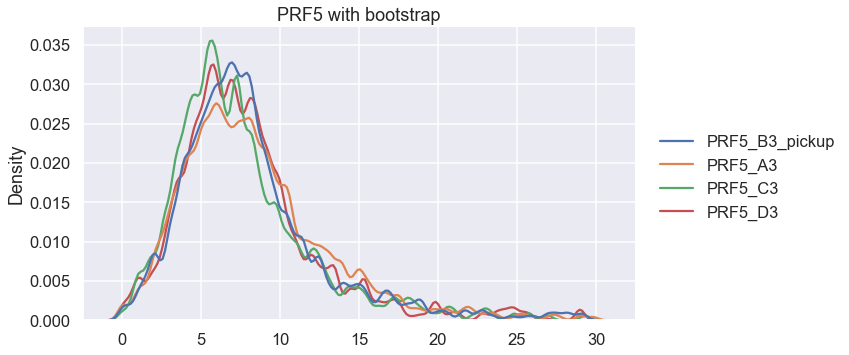

In [77]:
sns.displot(PRF5_bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='PRF5 with bootstrap')

In [78]:
# define bootstrap function 
# function is written specifically to fit master_df_2.csv formatting

def perform_bootstrap(dataframe, cell_line):
    df = dataframe
    cell_line_df = df[df['cell_line'] == cell_line]
    TRACK_MEAN_SPEED_df = cell_line_df[['TRACK_MEAN_SPEED', 'IMAGE_SERIES']]
    cell_line_list = TRACK_MEAN_SPEED_df.IMAGE_SERIES.unique()
    
    # perform loop to identify max length for all image series for this cell line
    max_length = 0
    for series in cell_line_list:
        series = TRACK_MEAN_SPEED_df[TRACK_MEAN_SPEED_df['IMAGE_SERIES'] == series]
        series_length = len(series)
        if series_length > max_length:
            max_length = series_length
        else:
            pass

    print('max_length: ', max_length)
    bootstrap_dict = {}

    # next, use the max length to bootstrap values for any series with fewer values than the max length
    for series in cell_line_list:
        series_values = TRACK_MEAN_SPEED_df[TRACK_MEAN_SPEED_df['IMAGE_SERIES'] == series]['TRACK_MEAN_SPEED']
        series_length = len(series_values)
        if series_length < max_length:
            x = np.random.choice(series_values, size=max_length, replace=True)
            bootstrap_dict[series] = x
        elif series_length == max_length:
            bootstrap_dict[series] = series_values
        else:
            print('Series length error')

    print(bootstrap_dict.keys())
    return bootstrap_dict



In [80]:
bootstrap_dict = perform_bootstrap(dataframe=df, cell_line='PRF5')
# bootstrap_dict

max_length:  2314
dict_keys(['PRF5_B3_pickup', 'PRF5_A3', 'PRF5_C3', 'PRF5_D3'])
